In [9]:
import pandas as pd
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts
from ord_data_load import draw_reaction_rand

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

ORD_REPO_PATH = './ord-data'
ORD_PATH = './ORD'

In [10]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

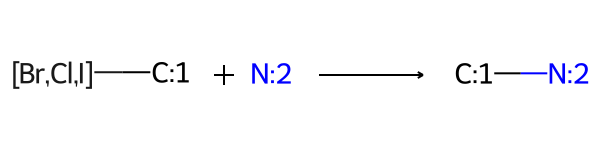

In [11]:
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[NX3:2]>>[c:1]-[NX3:2]"
rxn_pattern = ReactionFromSmarts(BUCHWALD_RXN_SMARTS)
rxn_pattern

In [26]:
%%time
mask = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rxn_pattern)
df_buchwald = pd_df[mask].copy()
len(df_buchwald)

CPU times: total: 1min 51s
Wall time: 1min 51s


8854

In [62]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
mask = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rxn_pattern,
                 meta=pd.Series(dtype=bool)).compute(scheduler='threads')
df_buchwald = pd_df[mask].copy()
len(df_buchwald)

[########################################] | 100% Completed | 138.80 s
[########################################] | 100% Completed | 138.90 s
[########################################] | 100% Completed | 139.00 s


8854

Reaction: 7887
Solvent: [['2-methyl-2-propanol', 'CC(C)(C)O']]
Catalyst [['tris(dibenzylideneacetone)dipalladium(0)', 'C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.[Pd].[Pd]'], ['palladium acetate', 'C(C)(=O)[O-].[Pd+2].C(C)(=O)[O-]'], ['Tris(dibenzylideneacetone)dipalladium(0)', 'C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.[Pd].[Pd]'], ['palladium acetate', 'C(C)(=O)[O-].[Pd+2].C(C)(=O)[O-]'], ['tris(dibenzylideneacetone)dipalladium(0)', 'C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.C=1C=CC(=CC1)/C=C/C(=O)/C=C/C2=CC=CC=C2.[Pd].[Pd]'], ['palladium acetate', 'C(C)(=O)[O-].[Pd+2].C(C)(=O)[O-]']]


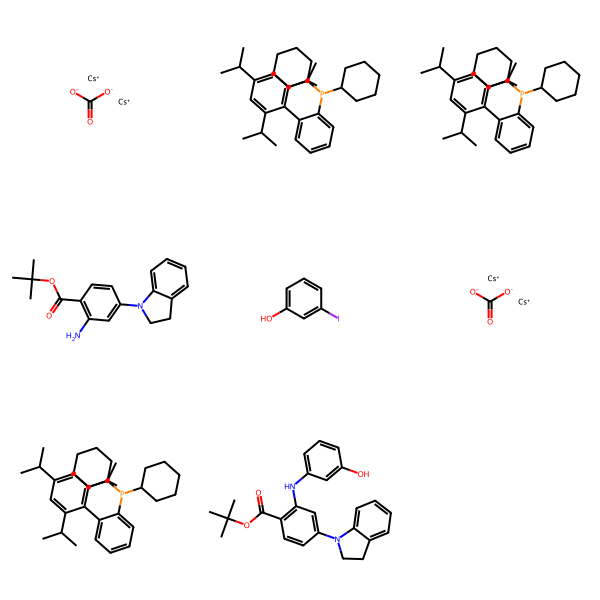

To 2-methyl-2-propanol 3.0 mL solution of tert-butyl 2-amino-4-(indolin-1-yl)benzoate 0.12 g were added 3-iodophenol 0.22 g, cesium carbonate 0.26 g, tris(dibenzylideneacetone)dipalladium(0) 3.7 mg, palladium acetate 1.8 mg and 2-dicyclohexylphosphino-2′,4′,6′-triisopropylbiphenyl 9.5 mg at room temperature, and it was stirred at 70° C. for 12 hours. Tris(dibenzylideneacetone)dipalladium(0) 3.7 mg, palladium acetate 1.8 mg and 2-dicyclohexylphosphino-2′,4′,6′-triisopropylbiphenyl 9.5 mg were added to it, and it was stirred at 70° C. for 7 hours. Cesium carbonate 0.26 g, tris(dibenzylideneacetone)dipalladium(0) 3.7 mg, palladium acetate 1.8 mg and 2-dicyclohexylphosphino-2′,4′,6′-triisopropylbiphenyl 9.5 mg were added to it, and it was stirred at 70° C. for 12 hours. After the reaction mixture was cooled to room temperature, insoluble matter was filtrated, and ethyl acetate and 10% citric acid aqueous solution were added to it. The organic layer was separated and collected,dried over an

In [86]:
draw_reaction_rand(df_buchwald)